# SNLP Assignment 4

Name 1: Rayyan Mohammad Minhaj<br/>
Student id 1: 7074982<br/>
Email 1: rami00002@stud.uni-saarland.de<br/>


Name 2: Abdullah Abdul Wahid <br/>
Student id 2: 7075730 <br/>
Email 2: abyy00002@stud.uni-saarland.de<br/> 

Name 3: <br/>
Student id 3: <br/>
Email 3: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

# OOVs ( 4 Points)

Out-of-vocabulary words are a problem in language modeling, because of data sparsity.
In this exercise we will axamine the impact of vocab size on OOV rate and how this affects the performance of the model.

1. What are out-of-vocabulary words (OOVs)? (0.25 points)
2. What happened to perplexity with low-frequency words? (0.25 points)

### Answers:

1 - OOV are those words that are not inside the predefined vocabulary set (out-of-vocabulary), and thus they cannot be recognised or processed by the language model. <br/><br/>
2 - Perplexity increases with low frequency words, this is because the model struggles to predict what comes next due to insufficient training data, leading to higher uncertainty and lower performance.

3. Load and split the data into a train and test set (70:30 ratio). Do not randomize leave the order as is. (0.5point)

In [ ]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank

### TODO

def load_and_preprocess_data():
    ''' Function that loads the treebank corpus from nltk and preprocesses it'''
    corpus = treebank.sents() #so this just contains some sentences, and each sentence is tokenized into its own list and each word is its own element
    
    tokens = []
    for item in corpus:
        for word in item:
            tokens.append(word.lower()) #also lower case-d it because of what Assignment 2 taught us!

    return tokens

def train_test_split(corpus, train_ratio=0.7):
    '''Splits the corpus using a 70:30 ratio. Do not randomize anything here. use the original order
    Input: corpus - preprocessed test
    Output: tuple of train and test set'''

    split_point = int(len(corpus) * train_ratio)
    train = corpus[:split_point]
    test = corpus[split_point:]
    return train, test
    

4. Complete the function that selects the top n frequent words to form a vocabulary. (0.5 point)

In [ ]:
from collections import Counter #this will make getting most common elements easier

def make_vocab(tokens, top_n: int) -> set:
    '''Make the top_n frequent vocabulary from a corpus
    Input:tokens - list of tokens
         top_n  - int
    Output: the vocabulary - set of words'''
    
    counter = Counter(tokens)
    most_common = counter.most_common(top_n) #basically getting the top n most common elements
    
    vocab = set()
    for word, _ in most_common:
        vocab.add(word)

    return vocab #returns n most common elements/tokens

        

5. Complete the function that restricts a corpus to the top_n Vocabulary, i.e. replace  all OOVs with a new `<unk>` token. (1 point)

In [ ]:

def restrict_vocab(corpus, vocab):
    '''Make the corpus fit inside the vocabulary using <unk>
    Input: corpus - text to be resticted
         vocab  - set of words
    Output: Corpus resticted to vocab'''
    restricted_corpus = []

    for word in corpus:
        if word in vocab:
            restricted_corpus.append(word)
        else:
            restricted_corpus.append('<unk>')
     

    return restricted_corpus
    

6. Plot the OOV rate of the test set for varying vocabulary sizes. (1 point)

In [ ]:
import matplotlib.pyplot as plt

def get_OOV_rate(text, vocab):
    ''' Function that returns the OOV rate for a given corpus and Vocab
    Input: corpus - preprocessed text
         vocab  - set of words
    Output: OOV rate - float '''
    total_tokens = len(text)
    oov_tokens = 0
    
    for word in text:
         if word not in vocab:
              oov_tokens+=1
     
    if total_tokens > 0:
         return oov_tokens/total_tokens
    else:
         return 0.0



def plot_OOV_rates(train, test, top_n):
     ''' Function that returns the OOV rate for a given corpus and Vocab
    Input: corpus - preprocessed text
         vocab  - set of words
         top_n - list[int] '''
     
     oov_rates = []

     for top in top_n:
          vocab = make_vocab(train, top)
          oov_rate = get_OOV_rate(test,vocab)
          oov_rates.append(oov_rate)

     
     plt.figure(figsize=(10, 5))
     plt.plot(top_n, oov_rates, marker='o')
     plt.title("OOV Rate vs Vocabulary Size (on Test Set)")
     plt.xlabel("Vocabulary Size (Top N)")
     plt.ylabel("OOV Rate")
     plt.grid(True)
     plt.show()
     


### Driver Code

Top 100 vocab`s OOV Rate: 0.4887
Top 200 vocab`s OOV Rate: 0.4279
Top 500 vocab`s OOV Rate: 0.3365
Top 1000 vocab`s OOV Rate: 0.2655
Top 5000 vocab`s OOV Rate: 0.1274
Top 15000 vocab`s OOV Rate: 0.0959


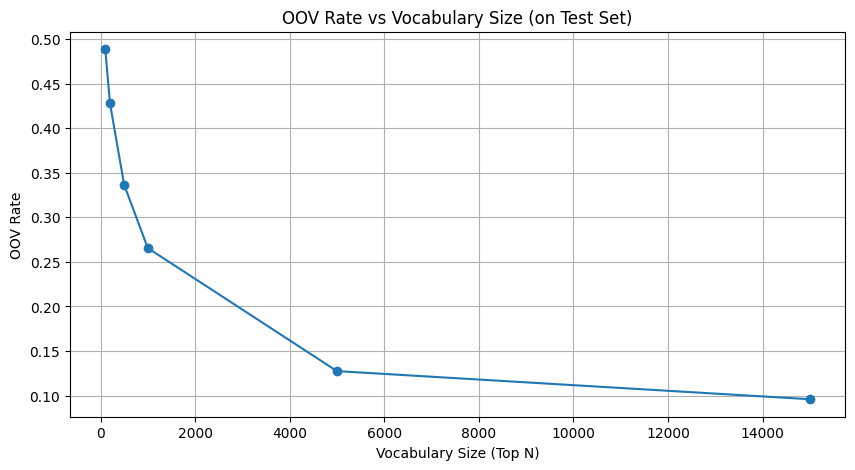

In [ ]:
tokens = load_and_preprocess_data()
train, test = train_test_split(tokens)

vocab_size = [100, 200, 500, 1000, 5000, 15000]

for topn in vocab_size:
    vocab = make_vocab(train, topn)
    oov_rate = get_OOV_rate(test, vocab)
    print(f'Top {topn} vocab`s OOV Rate: {oov_rate:0.4f}')


plot_OOV_rates(train, test, vocab_size)




7. Why would we restrict Vocabulary size if OOVs are a problem.(0.5 points)

We restrict vocabulary size due to long training time, model commplexity, memory usage, but above all else, because we simply cannot have each and every word/phrase inside our vocabulary set. Large vocabulary increases sparsity, making model harder to train; we can think of it like having 100,000 words to choose from when predicting the next word.

# Tokenization (6 Points)

In the previous part we replaced OOVs with a`<unk>` Token. Another approach is to change tokenization to split words in to subwords. In the lecture we learnt about two methods that do this BPE and Morfessor. In this part we will see how they work using text data in English and Hindi. We will also compare them by looking at the entropy of the token distributions and how they handle OOVs.

1. Load the parallel corpus (English-Hindi), preprocess and split the text in words for both languages. Also split into train and test sets using the same ratio as in the previous part.(1 point)

In [1]:
from exercise_2 import (
    train_bpe,
    entropy_and_oov,
    prepare_morfessor_file,
    train_morfessor_model,
    morfessor_tokenize,
    TokenizerEntropy
)



from datasets import load_dataset

# Load the Samanantar dataset for English-Hindi
dataset = load_dataset("ai4bharat/samanantar", "hi", split="train",streaming = True)

# Access the  first 1000 samples of the train split
data = []
for i, sample in enumerate(dataset):
    if i == 1000:
        break
    data.append(sample)

# Print a sample
print(data[0])

c:\Users\rayya\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'idx': 0, 'src': "However, Paes, who was partnering Australia's Paul Hanley, could only go as far as the quarterfinals where they lost to Bhupathi and Knowles", 'tgt': 'आस्ट्रेलिया के पाल हेनली के साथ जोड़ी बनाने वाले पेस मियामी में क्वार्टरफाइनल तक ही पहुंच सके क्योंकि इस दौर में उन्हें भूपति और नोल्स ने हराया था।'}


In [2]:
from sklearn.model_selection import train_test_split
# preprocess data
en_texts = []
hi_texts = []

for sample in data:
    en_words = sample['src'].strip().split()
    hi_words = sample['tgt'].strip().split()

    en_texts.append(en_words)
    hi_texts.append(hi_words)


en_train, en_test = train_test_split(en_texts, train_size=0.7)
hi_train, hi_test = train_test_split(hi_texts, train_size=0.7)
    

2. Train a BPE tokenizer for both languages. (1 point)
3. Compute the entropy and OOV rate of the test set for both languages. What does the entropy tell us? (1 point)

In [ ]:
!pip install tokenizers

     ---------------------------------------- 2.4/2.4 MB 4.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\rayya\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from collections import Counter
import math


vocab_size = 500
bpe_tokenizer_en = train_bpe(en_train, vocab_size)
bpe_tokenizer_hi = train_bpe(hi_train, vocab_size)


bpe_entropy_en, bpe_OOV_rate_en = entropy_and_oov(en_test, bpe_tokenizer_en)
bpe_entropy_hi, bpe_OOV_rate_hi = entropy_and_oov(hi_test, bpe_tokenizer_hi)


print(f"BPE entropy english: {bpe_entropy_en:.2f}")
print(f"BPE entropy hindi: {bpe_entropy_hi:.2f}")
print(f"BPE OOV rate english: {bpe_OOV_rate_en:.2f}")
print(f"BPE OOV rate hindi: {bpe_OOV_rate_hi:.2f}") #PS: there is a character in hindi here that is out-of-alphabet, change it to 9 dp and you can view the actual oov rate :P

BPE entropy english: 7.96
BPE entropy hindi: 7.91
BPE OOV rate english: 0.00
BPE OOV rate hindi: 0.00


---
# An OOV Rate of 0.00??
This is the key advantage of BPE and Morfessor (subword tokenization methods). The vocabulary includes not only whole words but subwords, characters, or even byte-level symbols. Any unseen word can always be broken down into smaller units that do exist in the vocabulary!!!

---

4. Train the Morfessor tokenizer on each corpus. Morphesor expects the count followed by the word as a training file.(1 points)

   ```
        22 the
        1 hello
        4 is
        1 test-based
        ...

In [ ]:
!pip install morfessor

You should consider upgrading via the 'C:\Users\rayya\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import morfessor
# save the words with their counts to morfessor_training_en.txt and morfessor_training_hi.txt

prepare_morfessor_file(en_train, "morfessor_train_en.txt")
prepare_morfessor_file(hi_train, "morfessor_train_hi.txt")




In [5]:
#train the models
alpha =  0.53

morfessor_model_en = train_morfessor_model("morfessor_train_en.txt", alpha)
morfessor_model_hi = train_morfessor_model("morfessor_train_hi.txt", alpha)

...........................................................
...........................................................
...........................................................
...........................................................
...........................................................
...........................................................
...........................................................
...........................................................
...........................................................


5. Tokenize each test set again using Morfessor. (1 point)

In [6]:
#tokenize test sets
morf_en_test = morfessor_tokenize(morfessor_model_en, en_test)
morf_hi_test = morfessor_tokenize(morfessor_model_hi, hi_test)


6. Compare the OOV rate and entropy to BPE. How do they compare for both languages? (1 point)

In [8]:
#Compute entropys and OOV rates
entropy_calc = TokenizerEntropy()


morf_vocab_en = set(construction[0] for construction in morfessor_model_en.get_constructions())
morf_vocab_hi = set(construction[0] for construction in morfessor_model_hi.get_constructions())


morfessor_entropy_en, morfessor_OOV_rate_en = entropy_calc.compute_entropy_and_oov(morf_en_test, morf_vocab_en)
morfessor_entropy_hi, morfessor_OOV_rate_hi = entropy_calc.compute_entropy_and_oov(morf_hi_test, morf_vocab_hi)


print(f"Morfessor entropy english: {morfessor_entropy_en:.2f}")
print(f"Morrfessor entropy hindi: {morfessor_entropy_hi:.2f}")
print(f"Morfessor OOV rate english: {morfessor_OOV_rate_en:.2f}")
print(f"Morfessor OOV rate hindi: {morfessor_OOV_rate_hi:.2f}")

Morfessor entropy english: 7.91
Morrfessor entropy hindi: 7.74
Morfessor OOV rate english: 0.00
Morfessor OOV rate hindi: 0.00


### Comparing Entropy of BPE and Morfessor
For English, Morfessor had entropy of 7.91, and BPE had 7.96. Morfessor has slightly lower entropy, suggesting it models English word/subword distributions a bit better than BPE. <br/>
For Hindi, Morfessor had entropy of 7.74, and BPE had 7.91. Again, Morfessor outperforms BPE in entropy, more noticeably for Hindi, indicating better compression and prediction. <br/>

---

### Comparing OOV Rate of BPE and Morfessor
Both models have an OOV (Out-of-Vocabulary) rate of 0.00 for both languages, which means both are equally effective in covering the vocabulary through subword segmentation. Since both achieve 0% OOV, Morfessor would generally be the preferred model here, especially for morphologically rich languages like Hindi. <br/>

